In [2]:
%%capture
from pathlib import Path

if Path.cwd().stem == "features":
    %cd ../..
    %load_ext autoreload
    %autoreload 2

In [3]:
import logging
from pathlib import Path

import holoviews as hv
import hvplot.polars
import matplotlib.pyplot as plt
import neurokit2 as nk
import numpy as np
import pandas as pd
import plotly.io as pio
import polars as pl
from icecream import ic
from polars import col

from src.data.database_manager import DatabaseManager
from src.features.quality_checks import check_sample_rate
from src.features.scaling import scale_min_max
from src.features.transformations import add_time_column, map_trials
from src.log_config import configure_logging

configure_logging(
    stream_level=logging.DEBUG,
    ignore_libs=["matplotlib", "Comm", "bokeh", "tornado"],
)

pl.Config.set_tbl_rows(12)  # for the 12 trials
hv.output(widget_location="bottom", size=130)

In [4]:
db = DatabaseManager()

In [5]:
with db:
    df = db.read_table("Raw_PPG")
df = df.filter(col("trial_id") < 200)
df

trial_id,trial_number,participant_id,rownumber,timestamp,samplenumber,ppg_d_battery,ppg_raw,ppg_heartrate,ppg_ibi,ppg_d_packetreceptionrate
u16,u8,u8,u32,f64,i64,f64,f64,i64,f64,i64
1,1,1,37660,294210.3603,57892,3686.174359,1424.175824,-1,-1.0,100
1,1,1,37661,294211.3575,57893,3693.45641,1438.095238,-1,-1.0,100
1,1,1,37662,294211.3575,57894,3687.630769,1415.384615,-1,-1.0,100
1,1,1,37663,294224.331,57895,3677.435897,1441.025641,-1,-1.0,100
1,1,1,37664,294242.275,57896,3687.630769,1407.326007,-1,-1.0,100
1,1,1,37665,294242.275,57897,3694.912821,1435.897436,-1,-1.0,100
…,…,…,…,…,…,…,…,…,…,…
199,11,17,336983,2.6326e6,449845,3926.482051,1399.267399,60,-1.0,99
199,11,17,336984,2.6326e6,449846,3906.092308,1362.637363,60,-1.0,99


### Stimulus

In [6]:
features = ["ppg_raw", "ppg_heartrate", "ppg_ibi"]
ppg = df.filter(col("trial_id") == 151).clone()
# ppg = scale_min_max(ppg)
# ppg = interpolate(ppg)
ppg.hvplot(
    x="timestamp", y=features, groupby="trial_id", kind="line", width=800, height=400
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'c6927fd0-6f2b-4eed-9718-d130a445f74e': {'version…

In [9]:
def process_ppg(
    df: pl.DataFrame,
    sampling_rate: int = 100,
) -> pl.DataFrame:
    ppg_raw = df.select("ppg_raw").to_numpy().flatten()
    ppg_processed: pd.DataFrame = nk.ppg_process(
        ppg_raw,
        sampling_rate=sampling_rate,
        method="neurokit",
    )  # returns EDA_Phasic and EDA_Tonic columns
    return df.hstack(pl.from_pandas(ppg_processed))

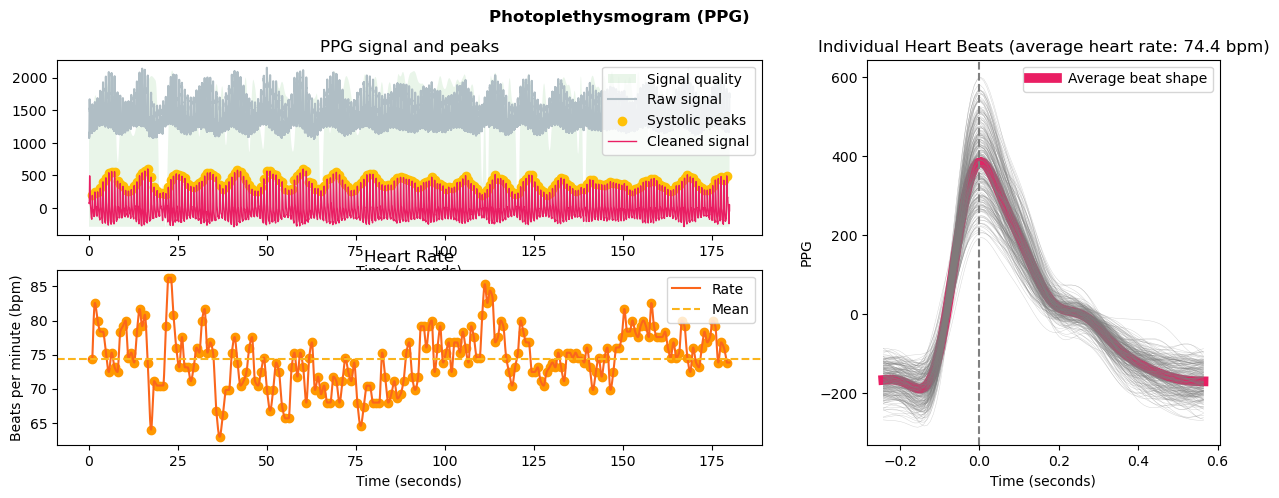

In [16]:
signals, info = nk.ppg_process(ppg.get_column("ppg_raw").to_numpy(), sampling_rate=128)

# Visualize the processing
nk.ppg_plot(signals, info)

<Axes: >

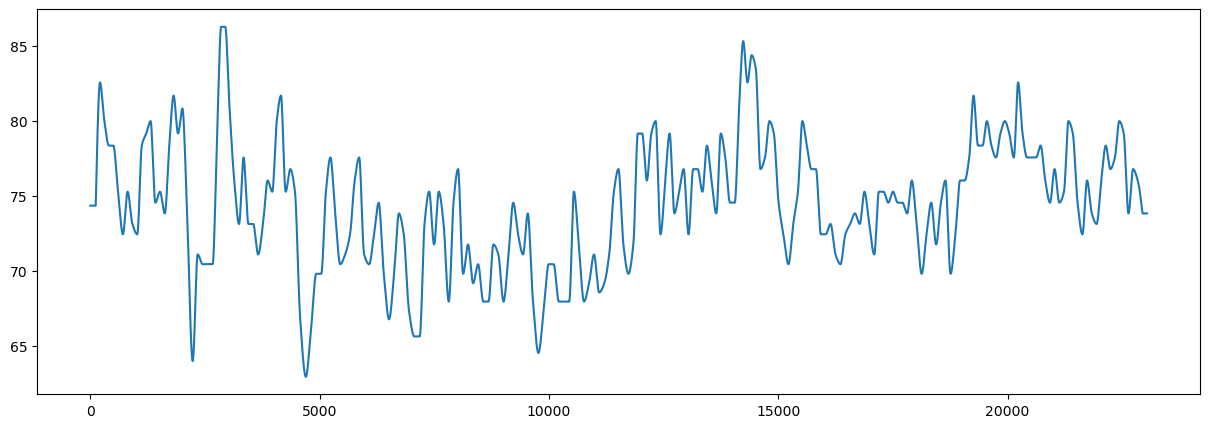

In [12]:
signals["PPG_Rate"].plot()

In [17]:
ppg_cleaned = nk.ppg_clean(
    ppg.get_column("ppg_raw").to_numpy(),
    sampling_rate=128,
)
quality = nk.ppg_quality(ppg_cleaned, sampling_rate=128, method="templatematch")

In [18]:
ppg_cleaned

array([ 76.48455671,  75.05145278,  73.41826045, ...,  14.98773506,
       -11.52959794, -40.98547642])

In [21]:
ppg.plot(x="timestamp", y="ppg_raw", kind="line", width=800, height=400)

:Curve   [timestamp]   (ppg_raw)

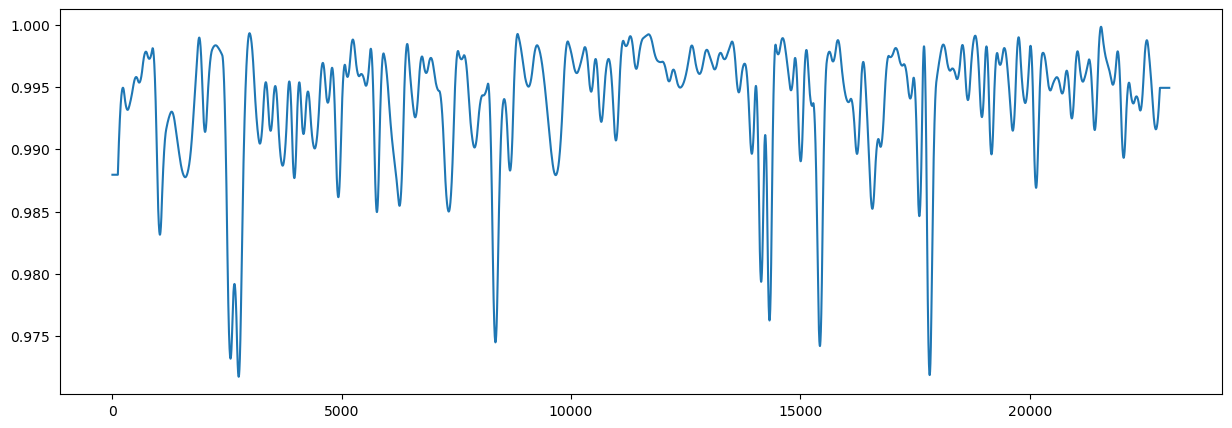

In [22]:
plt.plot(quality)